# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale


Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

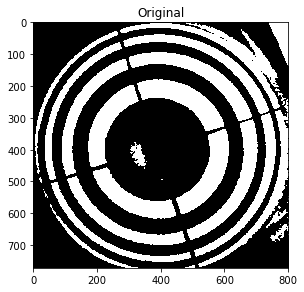

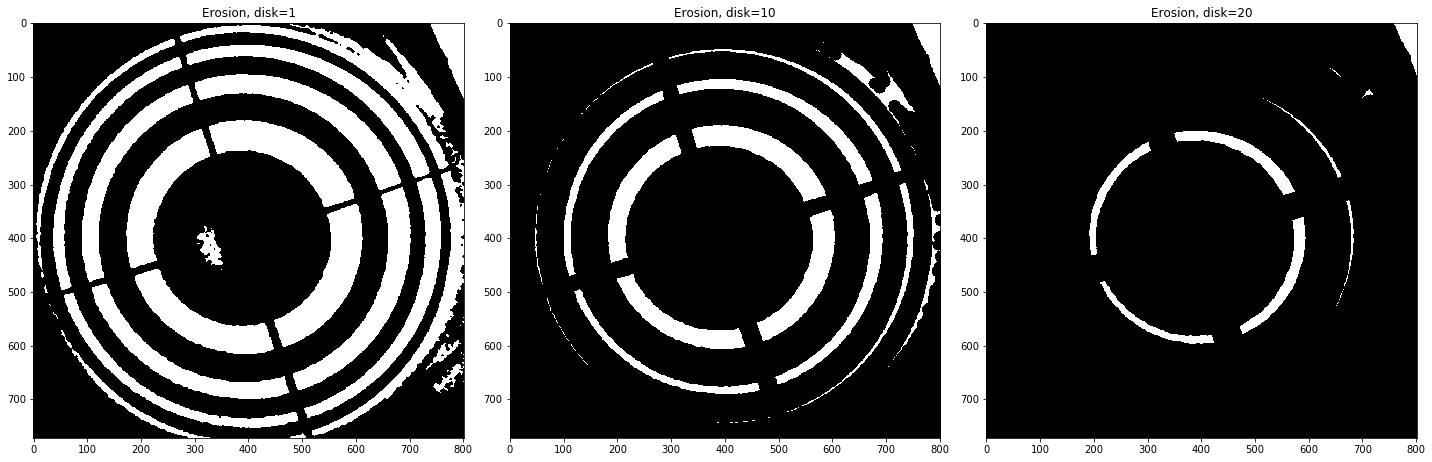

In [25]:
from skimage.morphology import erosion, disk

im = io.imread('./images/FindingContours.png')

plt.figure()
io.imshow(im)
plt.title('Original')

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
io.imshow(erosion(im,disk(1)))
plt.title('Erosion, disk=1')
plt.subplot(1,3,2)
io.imshow(erosion(im,disk(10)))
plt.title('Erosion, disk=10')
plt.subplot(1,3,3)
io.imshow(erosion(im,disk(20)))
plt.title('Erosion, disk=20')



** Q.1.2 Dilation **

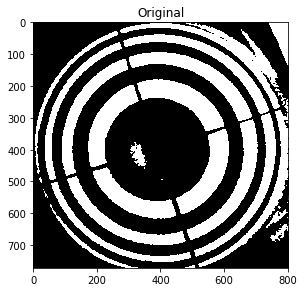

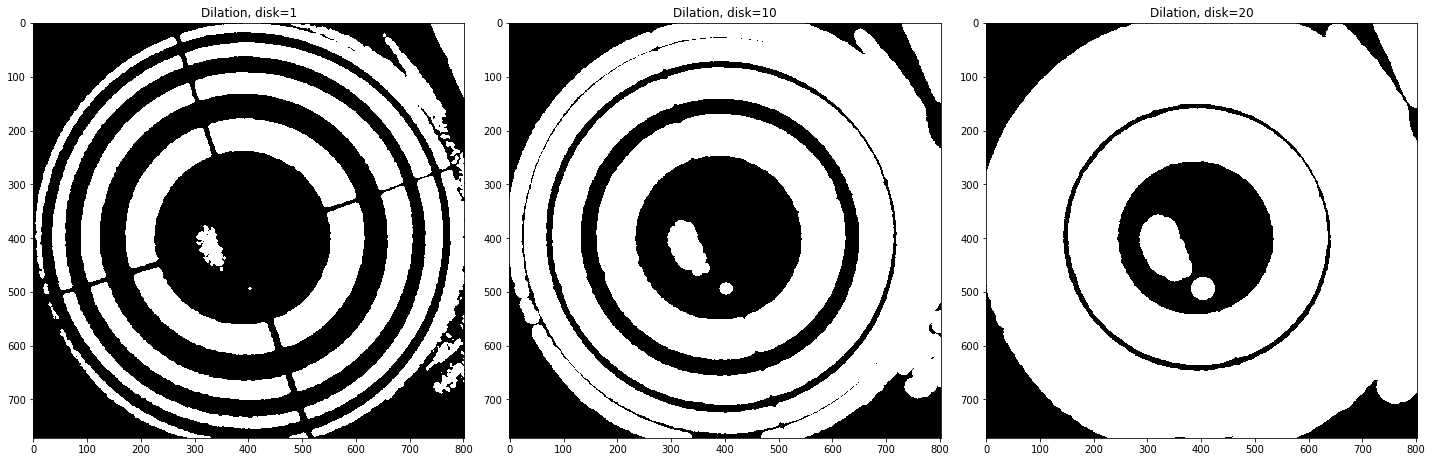

In [8]:
from skimage.morphology import dilation, opening, closing, disk

im = io.imread('./images/FindingContours.png')

plt.figure()
io.imshow(im)
plt.title('Original')

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
io.imshow(dilation(im,disk(1)))
plt.title('Dilation, disk=1')

plt.subplot(1,3,2)
io.imshow(dilation(im,disk(10)))
plt.title('Dilation, disk=10')

plt.subplot(1,3,3)
io.imshow(dilation(im,disk(20)))
plt.title('Dilation, disk=20')

** Q.1.3 Opening **

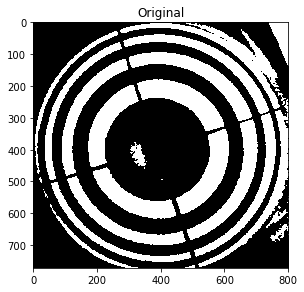

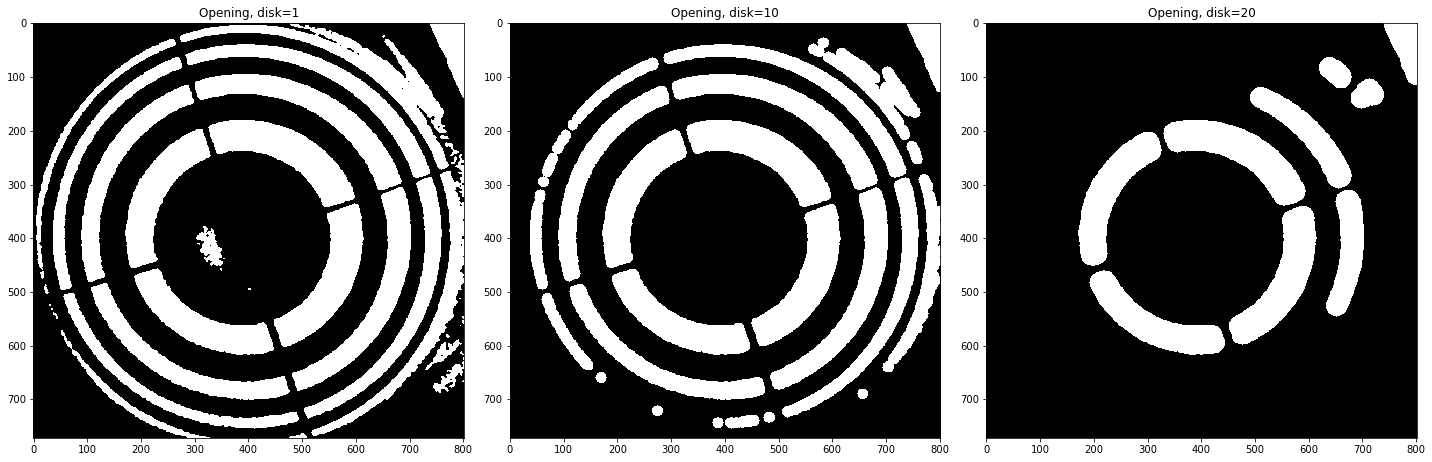

In [21]:
from skimage.morphology import opening, disk

im = io.imread('./images/FindingContours.png')

plt.figure()
io.imshow(im)
plt.title('Original')

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
io.imshow(opening(im,disk(1)))
plt.title('Opening, disk=1')

plt.subplot(1,3,2)
io.imshow(opening(im,disk(10)))
plt.title('Opening, disk=10')

plt.subplot(1,3,3)
io.imshow(opening(im,disk(20)))
plt.title('Opening, disk=20')

** Q.1.4 Closing**

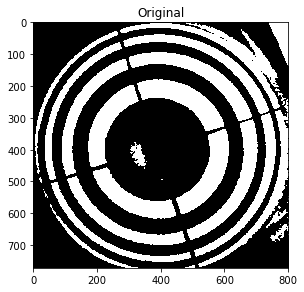

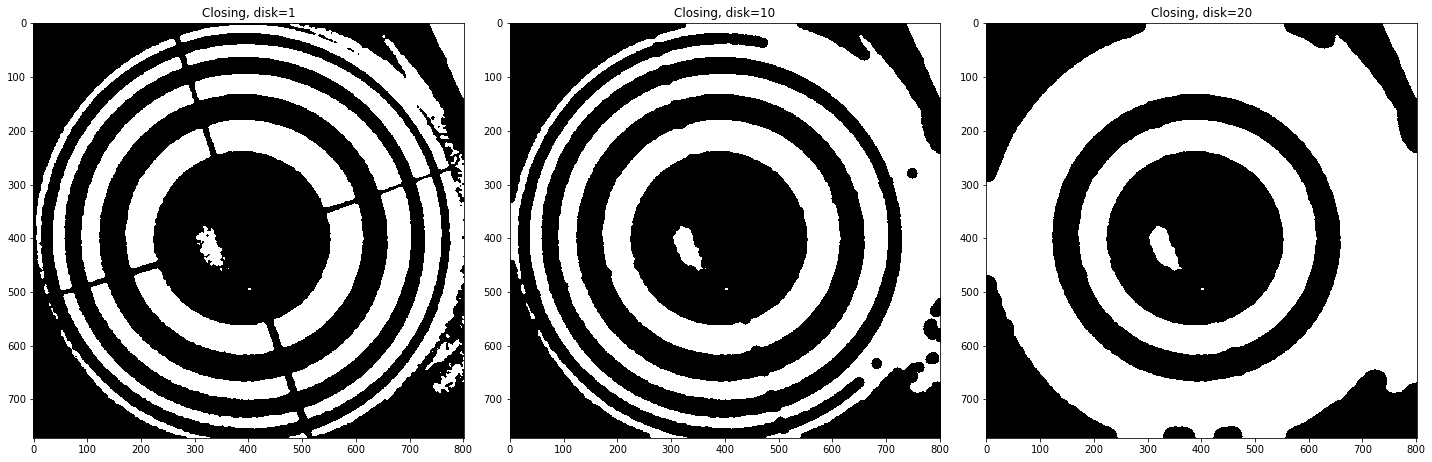

In [19]:
from skimage.morphology import closing, disk

im = io.imread('./images/FindingContours.png')

plt.figure()
io.imshow(im)
plt.title('Original')

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
io.imshow(closing(im,disk(1)))
plt.title('Closing, disk=1')

plt.subplot(1,3,2)
io.imshow(closing(im,disk(10)))
plt.title('Closing, disk=10')

plt.subplot(1,3,3)
io.imshow(closing(im,disk(20)))
plt.title('Closing, disk=20')


** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

- Erosion: Shrinks connected sets of 1s in a binary image. It can be used for shriking features and removing bridges, braches and small protusions.
- Dilation: Expands connected sets of 1s in a binary image. It can be used for growing features and filling holes and gaps.
- Opening: Operation built on dilation and erosion where erosion is followed by dilation.
- Closing: Operation built on dilation and erosion where dilation is followed by erosion.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Programs\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


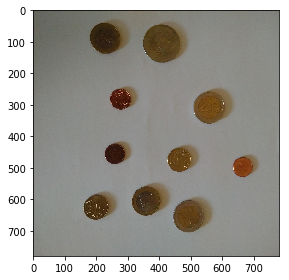

In [2]:
im = io.imread('./images/coins.jpg')
im = rescale(img_as_ubyte(im),.25)

io.imshow(im)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

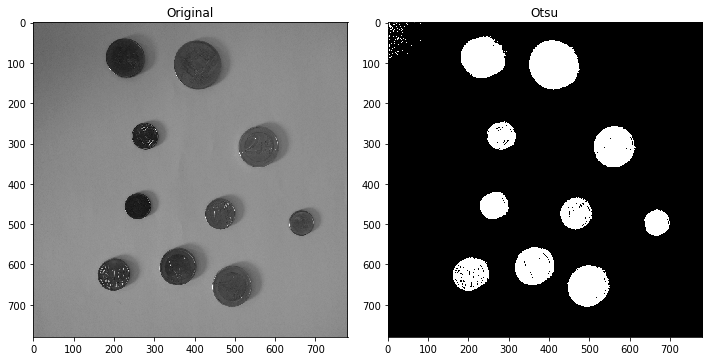

In [3]:
from skimage import color
from skimage.filters import threshold_otsu

im = color.rgb2grey(im)

im_threshold = im <= threshold_otsu(im)

plt.figure(figsize=(10,10))

plt.subplot(121)
io.imshow(im)
plt.title('Original')

plt.subplot(122)
io.imshow(im_threshold)
plt.title('Otsu')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

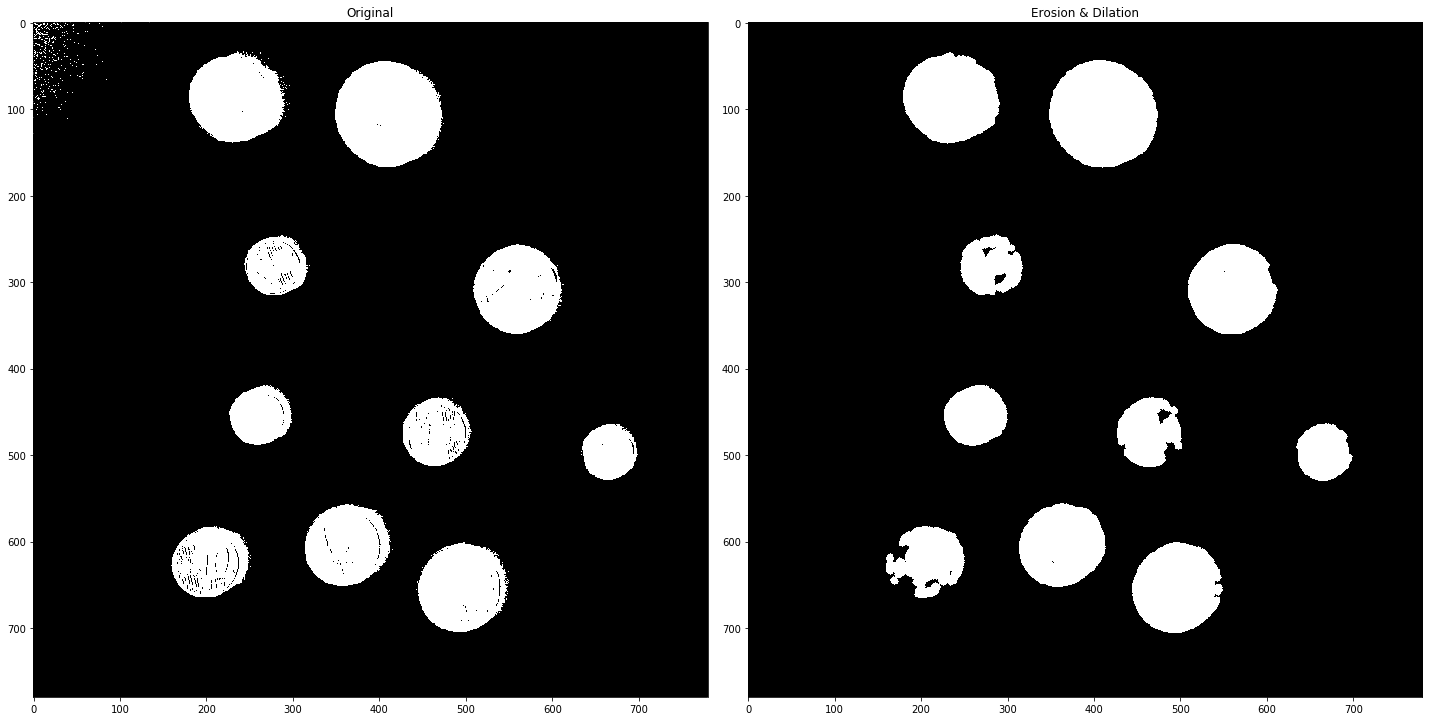

In [33]:
from skimage.morphology import erosion, dilation, disk

im_op = erosion(im_threshold,disk(3))
im_op = dilation(im_op,disk(4))

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
io.imshow(im_threshold)
plt.title('Original')

plt.subplot(1,2,2)
io.imshow(im_op)
plt.title('Erosion & Dilation')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\Programs\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


Total regions = 10
Region 1: radius=62 and area=12278 pxs
Region 2: radius=34 and area=4063 pxs
Region 3: radius=51 and area=8413 pxs
Region 4: radius=35 and area=4030 pxs
Region 5: radius=37 and area=4855 pxs
Region 6: radius=32 and area=3368 pxs
Region 7: radius=49 and area=7606 pxs
Region 8: radius=40 and area=5837 pxs
Region 9: radius=52 and area=8589 pxs


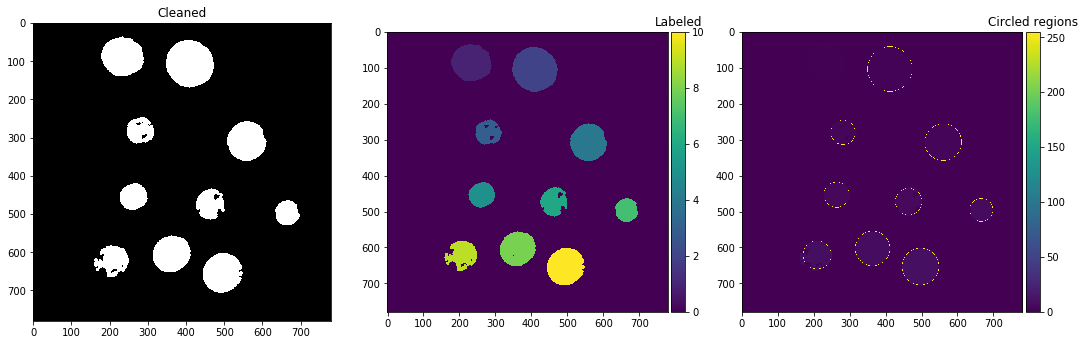

In [35]:
from skimage.draw import circle_perimeter
from skimage.measure import label, regionprops


im_label, num = label(im_op, return_num = True)
regions = regionprops(im_label)

plt.figure(figsize=(15,15))

plt.subplot(131)
io.imshow(im_op)
plt.title('Cleaned')

plt.subplot(132)
io.imshow(im_label)
plt.title('Labeled')

print('Total regions = {}'.format(num))

for i,r in enumerate(regions):
    if i == 0: continue
    radius = r.equivalent_diameter / 2.
    area = r.convex_area
    print('Region {}: radius={:.0f} and area={:.0f} pxs'.format(i,radius,area))
    c0, c1 = circle_perimeter(int(r.centroid[0]), int(r.centroid[1]), int(radius))
    im_label[c0,c1] = 255
    
plt.subplot(133)
io.imshow(im_label)
plt.title('Circled regions')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

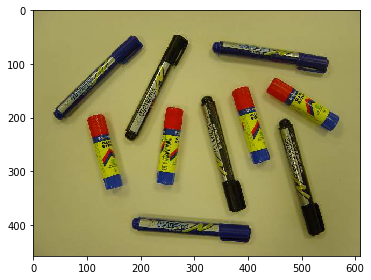

In [42]:
im = io.imread('./images/objets4.jpg')

io.imshow(im)

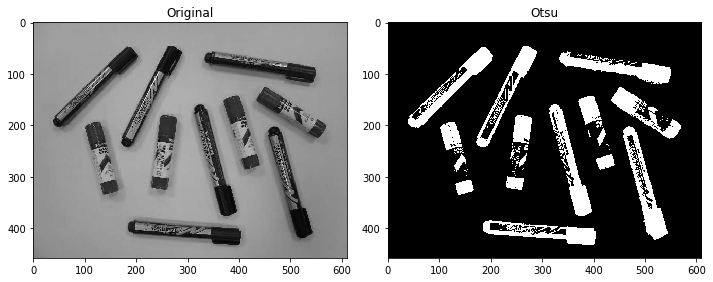

In [53]:
from skimage import color
from skimage.filters import threshold_otsu

im = color.rgb2grey(im)

im_threshold = im <= threshold_otsu(im)

plt.figure(figsize=(10,10))

plt.subplot(121)
io.imshow(im)
plt.title('Original')

plt.subplot(122)
io.imshow(im_threshold)
plt.title('Otsu')

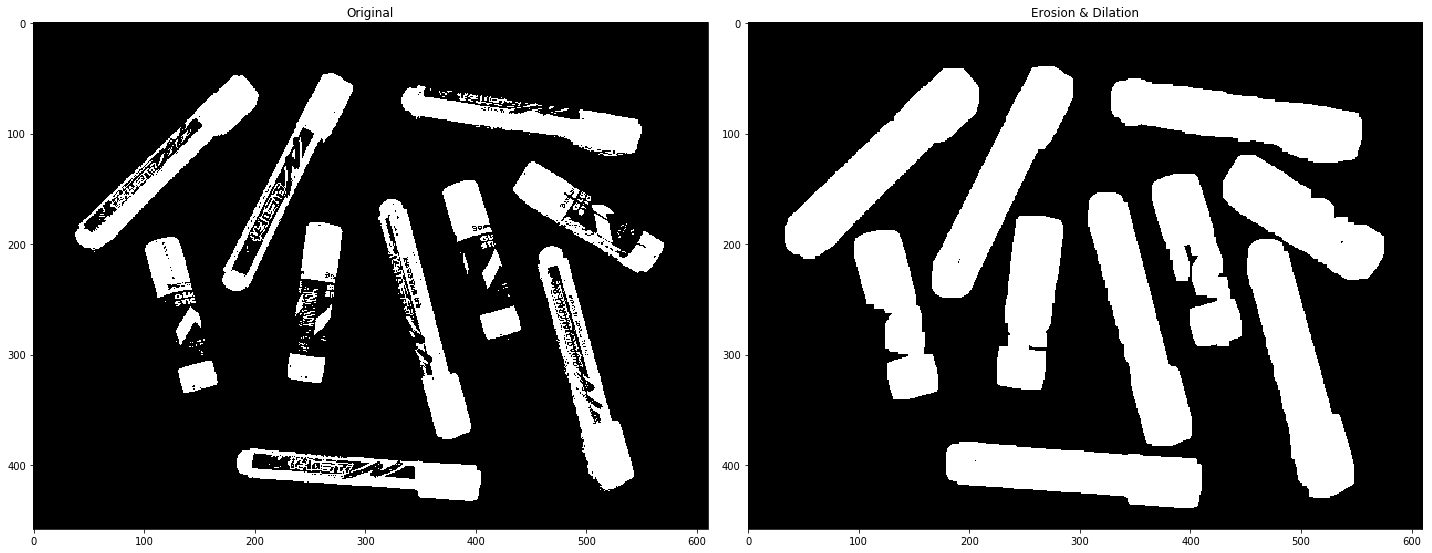

In [156]:
from skimage.morphology import erosion, dilation, rectangle

im_op = im_threshold
im_op = dilation(im_op,rectangle(9,5))
im_op = dilation(im_op,rectangle(5,7))


plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
io.imshow(im_threshold)
plt.title('Original')

plt.subplot(1,2,2)
io.imshow(im_op)
plt.title('Erosion & Dilation')

C:\Programs\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Programs\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Programs\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
C:\Programs\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


Total regions = 10


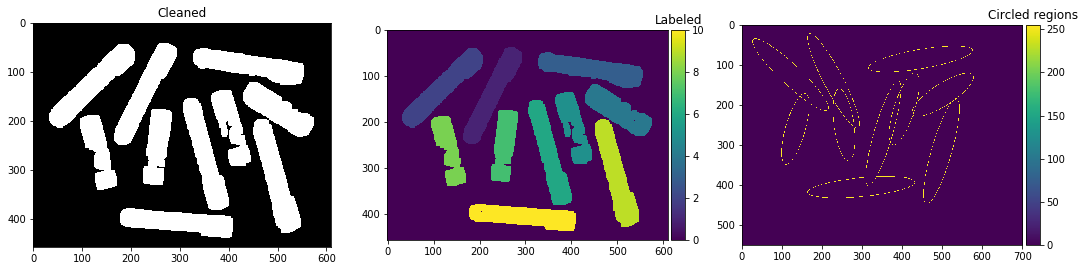

In [164]:
from skimage.draw import polygon_perimeter, ellipse_perimeter
from skimage.measure import label, regionprops


im_label, num = label(im_op, return_num = True)
regions = regionprops(im_label)

plt.figure(figsize=(15,15))

plt.subplot(131)
io.imshow(im_op)
plt.title('Cleaned')

plt.subplot(132)
io.imshow(im_label)
plt.title('Labeled')

from skimage.transform import resize
im_label = resize(im_label, (550, 700))

print('Total regions = {}'.format(num))

for i,r in enumerate(regions):
#     if i == 1: continue
    c0, c1 = ellipse_perimeter(int(r.centroid[0]), int(r.centroid[1]), int(r.minor_axis_length/2), int(r.major_axis_length/2), r.orientation )
    im_label[c0,c1] = 255
    
plt.subplot(133)
io.imshow(im_label)
plt.title('Circled regions')

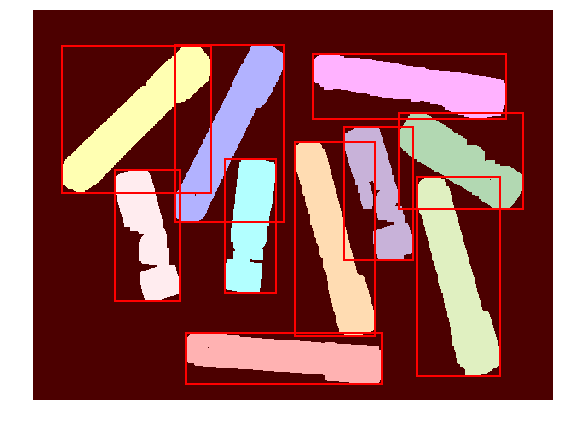

In [170]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


bw = im_op

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=im_op)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()